# APS 4

Software para análise de treliças planas.

Arquivo de entrada: `entrada.xlsx`

Arquivo de saída: `saida.xlsx`

___

In [140]:
# Importando bibliotecas necessárias

from funcoesTermosol import *
import numpy as np
import math

Ao importar os **dados de entrada**, temos: 

- nn $\rightarrow$ número de nós

- N $\rightarrow$ matriz dos nós

- nm $\rightarrow$ número de membros

- Inc $\rightarrow$ matriz de incidência

    - Colunas : 

    - Nó 1

    - Nó 2

    - E em $Pa$

    - Área em $m^2$

- nc $\rightarrow$ número de cargas

- F $\rightarrow$ forças (Vetor de carregamento)

- nr $\rightarrow$ número de restrições

- R $\rightarrow$ restrições (Vetor com os graus de liberdade)


In [141]:
# Importando dados de entrada e printando

[nn,N,nm,Inc,nc,F,nr,R] = importa('ponte.xls')
print("Número de nós :", nn)
print("")
print("-------------------------")
print("Matriz dos nós :\n")
print(N)
print("")
print("-------------------------")
print("Número de membros :", nm)
print("")
print("-------------------------")
print("Matriz de incidência :\n")
print(Inc)
print("")
print("-------------------------")
print("Número de cargas :", nc)
print("")
print("-------------------------")
print("Vetor de cargas :\n")
print(F)
print("")
print("-------------------------")
print("Número de restrições :", nr)
print("")
print("-------------------------")
print("Vetor de restrições :\n")
print(R)


Número de nós : 7

-------------------------
Matriz dos nós :

[[0.    0.144 0.192 0.288 0.384 0.432 0.576]
 [0.    0.072 0.    0.144 0.    0.072 0.   ]]

-------------------------
Número de membros : 11

-------------------------
Matriz de incidência :

[[1.0000e+00 2.0000e+00 1.9314e+11 5.2500e-06]
 [2.0000e+00 4.0000e+00 1.9314e+11 5.2500e-06]
 [4.0000e+00 6.0000e+00 1.9314e+11 5.2500e-06]
 [6.0000e+00 7.0000e+00 1.9314e+11 5.2500e-06]
 [2.0000e+00 3.0000e+00 1.9314e+11 5.2500e-06]
 [3.0000e+00 4.0000e+00 1.9314e+11 5.2500e-06]
 [4.0000e+00 5.0000e+00 1.9314e+11 5.2500e-06]
 [5.0000e+00 6.0000e+00 1.9314e+11 5.2500e-06]
 [1.0000e+00 3.0000e+00 1.9314e+11 5.2500e-06]
 [3.0000e+00 5.0000e+00 1.9314e+11 5.2500e-06]
 [5.0000e+00 7.0000e+00 1.9314e+11 5.2500e-06]]

-------------------------
Número de cargas : 6

-------------------------
Vetor de cargas :

[[    0.]
 [    0.]
 [-1300.]
 [-1500.]
 [    0.]
 [    0.]
 [-1300.]
 [-1500.]
 [    0.]
 [    0.]
 [-1300.]
 [-1500.]
 [    0.]
 [ 

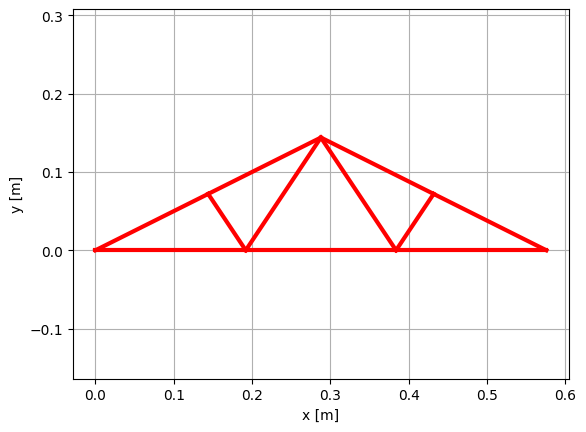

In [142]:
# Função que cria imagem da estrutura

plota(N,Inc)

___

## Pré-processamento

Uma vez demonstrados e importados os dados necessários, podemos começar o **pré-processamento dos dados**. Para isso, seguiremos os seguintes passos: 

1. Montar a matriz de conectividade

2. Montar a matriz de rigidez de cada elemento

3. Montar a matriz de rigidez global da treliça

4. Montar o vetor de carregamento global (vetor de forças)

5. Aplicar as condições de contorno nas matrizes de rigidez e de forças


In [143]:
# Credits to braingineer https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
def matprint(mat, fmt="g"):        
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

**Fazendo Matriz Global a partir das locais**



In [144]:
'''
Dentro do for, serão criadas as matrizes de rigidez de cada elemento.

A partir disto, ao final, iremos somando até que quando sair do loop, 
teremos a matriz de rigidez global.

'''

kglobal = np.zeros((nn*2,nn*2))

for elemento in range(nm):

    no1 = int(Inc[elemento,0]) -1
    no2 = int(Inc[elemento,1]) -1

    E = Inc[elemento,2]
    A = Inc[elemento,3]

    L = np.sqrt((N[0,no2]-N[0,no1])**2+(N[1,no2]-N[1,no1])**2)
    c2 = ((N[0,no2]-N[0,no1])/L)**2
    s2 = ((N[1,no2]-N[1,no1])/L)**2
    cs = ((N[0,no2]-N[0,no1])*(N[1,no2]-N[1,no1]))/(L**2)
    print("L = ",L)


    klocal = np.array([[c2,cs,-c2,-cs],[cs,s2,-cs,-s2],[-c2,-cs,c2,cs],[-cs,-s2,cs,s2]])
   
 
    klocal = (E*A/L)*klocal
    list_dot = [2*no1, 2*no1+1, 2*no2, 2*no2+1]
    

    kglobal[np.ix_(list_dot,list_dot)] += klocal

print("\nMatriz de rigidez global")
matprint(kglobal)

L =  0.16099689437998485
L =  0.16099689437998485
L =  0.16099689437998488
L =  0.16099689437998482
L =  0.08653323061113574
L =  0.17306646122227146
L =  0.17306646122227148
L =  0.08653323061113573
L =  0.192
L =  0.192
L =  0.19199999999999995

Matriz de rigidez global
 1.03197e+07   2.51927e+06  -5.03853e+06  -2.51927e+06  -5.28117e+06             0             0             0             0             0             0             0             0             0  
 2.51927e+06   1.25963e+06  -2.51927e+06  -1.25963e+06             0             0             0             0             0             0             0             0             0             0  
-5.03853e+06  -2.51927e+06   1.36826e+07       -369715   -3.6055e+06   5.40825e+06  -5.03853e+06  -2.51927e+06             0             0             0             0             0             0  
-2.51927e+06  -1.25963e+06       -369715   1.06316e+07   5.40825e+06  -8.11237e+06  -2.51927e+06  -1.25963e+06             0            

Agora, visto que temos restrições, precisamos aplicar as **condições de contorno** nas matrizes de rigidez e de forças. Feito isso, ambas as matrizes estarão prontas para serem resolvidas.

**OBS:** Suas formas reduzidas são armazenadas em novas variáveis.

In [145]:
kglobalred = kglobal.copy()

kglobalred = np.delete(kglobalred, R.astype(int), 0)
kglobalred =np.delete(kglobalred, R.astype(int), 1)
Fred = F.copy()
Fred = np.delete(Fred, R.astype(int), 0)
print("Matriz de rigidez global reduzida")
print("")
matprint(kglobalred)
print("--------------------------------------")
print("\nVetor de forcas reduzido")
print("")
matprint(Fred)

Matriz de rigidez global reduzida

 1.36826e+07       -369715   -3.6055e+06   5.40825e+06  -5.03853e+06  -2.51927e+06             0             0             0             0             0  
     -369715   1.06316e+07   5.40825e+06  -8.11237e+06  -2.51927e+06  -1.25963e+06             0             0             0             0             0  
 -3.6055e+06   5.40825e+06   1.59706e+07  -2.70412e+06  -1.80275e+06  -2.70412e+06  -5.28117e+06             0             0             0             0  
 5.40825e+06  -8.11237e+06  -2.70412e+06   1.21686e+07  -2.70412e+06  -4.05619e+06             0             0             0             0             0  
-5.03853e+06  -2.51927e+06  -1.80275e+06  -2.70412e+06   1.36826e+07   1.39698e-09  -1.80275e+06   2.70412e+06  -5.03853e+06   2.51927e+06             0  
-2.51927e+06  -1.25963e+06  -2.70412e+06  -4.05619e+06   1.39698e-09   1.06316e+07   2.70412e+06  -4.05619e+06   2.51927e+06  -1.25963e+06             0  
           0             0  -5.2811

___

Após aplicadas as condições de contorno, temos o fim da nossa etapa de pré-processamento. Agora, podemos partir para a etapa de **resolução**. Para isso, seguiremos os seguintes passos:

1. Aplicar um método numérico para resolver o sistema de equações e obter os deslocamentos nodais

    - **OBS :** Para esta etapa, utilizaremos o método de Gauss-Seidel

2. Calcular a deformação em cada elemento

3. Calcular a tensão em cada elemento

4. Determinar as reações de apoio 

In [146]:
'''
Os métodos numéricos que foram aplicados, foram os: Gauss-Seidel, Jacobi e o linalg.solve.
'''

print("\n--------------------------------------")
u_gauss = gauss_seidel(kglobalred, Fred, 10000, 0.0000001)
print("Vetor de deslocamentos:")
print("")
print(u_gauss)

print("\n--------------------------------------")  
u_jacobi = jacobi(kglobalred, Fred, 10000, 0.0000001)
print("Vetor de deslocamentos:")
print("")
print(u_jacobi)

print("\n--------------------------------------")
u_linalg = np.linalg.solve(kglobalred, Fred)
print("Vetor de deslocamentos:")
print("")
print(u_linalg)



# Selecionar metodo numerico

u = u_gauss



--------------------------------------
Iterações: 537
Vetor de deslocamentos:

[[ 0.00100474]
 [-0.00431173]
 [ 0.00035977]
 [-0.00466312]
 [ 0.00025974]
 [-0.00443927]
 [ 0.00055859]
 [-0.00463758]
 [-0.00032427]
 [-0.00424778]
 [ 0.00116451]]

--------------------------------------


c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:2318: RuntimeWarning: overflow encountered in scalar add
  res = _sum_(a)
c:\Users\FELIPE\OneDrive\Documentos\insper\semestre5\TransCal\APS_MECSOL\MECSOL-APS4\funcoesTermosol.py:183: RuntimeWarning: invalid value encountered in scalar multiply
  x[i][0] -= np.sum(K[i][j] * U[j][0] for j in range(n) if j != i)
c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:2318: RuntimeWarning: invalid value encountered in scalar add
  res = _sum_(a)
c:\Users\FELIPE\OneDrive\Documentos\insper\semestre5\TransCal\APS_MECSOL\MECSOL-APS4\funcoesTermosol.py:187: RuntimeWarning: invalid value encountered in divide
  list_tol = [abs((i - j) / j) for i, j in zip(x, U)]


Iterações: 10000
Vetor de deslocamentos:

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

--------------------------------------
Vetor de deslocamentos:

[[ 0.00100474]
 [-0.00431173]
 [ 0.00035977]
 [-0.00466313]
 [ 0.00025974]
 [-0.00443928]
 [ 0.00055859]
 [-0.00463759]
 [-0.00032427]
 [-0.00424778]
 [ 0.00116451]]


**Note que...** neste trecho a seguir, iremos "consertar" nosso vetor de deslocamento para torná-lo "global", ou seja, com o mesmo tamanho do vetor de forças. Para isso, basta adicionar zeros nas posições que correspondem aos graus de liberdade que foram restringidos.

In [147]:
Utotal = np.zeros(nn*2)
j=0
for i in range(nn*2):
    if i in R.astype(int):
        Utotal[i] = 0
    else:
        Utotal[i] = u[j]
        j+=1

print(Utotal)


[ 0.          0.          0.00100474 -0.00431173  0.00035977 -0.00466312
  0.00025974 -0.00443927  0.00055859 -0.00463758 -0.00032427 -0.00424778
  0.00116451  0.        ]


In [148]:
'''
Neste for, iremos calcular tanto a deformação quanto a tensão de cada elemento.

'''
listadefo = []
listatensao = []
listafint = []
for elemento in range(nm):
    no1 = int(Inc[elemento,0]) -1
    no2 = int(Inc[elemento,1]) -1
    E = Inc[elemento,2]
    A = Inc[elemento,3]
    L = np.sqrt((N[0,no2]-N[0,no1])**2+(N[1,no2]-N[1,no1])**2)
    c = ((N[0,no2]-N[0,no1])/L)
    s = ((N[1,no2]-N[1,no1])/L)
   
    list_dot = [Utotal[2*no1], Utotal[2*no1+1], Utotal[2*no2], Utotal[2*no2+1]]

    K = np.array([-c , -s , c , s])/L

    defo = 0
    for i in range(4):
        defo += K[i]*list_dot[i]

    tensao = E*defo
    fint = tensao*A
    listadefo.append(defo)
    listatensao.append(tensao)
    listafint.append(fint)

    print ("\n--------------------------------------")
    print(no1+1, no2+1)
    print("Deformacao no elemento ",elemento+1," = ",defo)
    print("Tensao no elemento ",elemento+1," = ",tensao)
    
print(listadefo)
print(listatensao)
print(listafint)



--------------------------------------
1 2
Deformacao no elemento  1  =  -0.006395157681025738
Tensao no elemento  1  =  -1235160754.513311

--------------------------------------
2 4
Deformacao no elemento  2  =  -0.004493148837611045
Tensao no elemento  2  =  -867806766.4961973

--------------------------------------
4 6
Deformacao no elemento  3  =  -0.0037764495454559992
Tensao no elemento  3  =  -729383465.2093717

--------------------------------------
6 7
Deformacao no elemento  4  =  -0.003528361106432125
Tensao no elemento  4  =  -681467664.0963006

--------------------------------------
2 3
Deformacao no elemento  5  =  -0.0007556111989172193
Tensao no elemento  5  =  -145938746.95887172

--------------------------------------
3 4
Deformacao no elemento  6  =  0.0007556107572798051
Tensao no elemento  6  =  145938661.66102156

--------------------------------------
4 5
Deformacao no elemento  7  =  0.0019112541001497056
Tensao no elemento  7  =  369139616.90291417

---------

In [149]:
'''
Tendo os deslocamentos, podemos calcular as reações de apoio.

'''

Reacao = kglobal.dot(Utotal)
reacaored = []

for i in range(nn*2):
    if i in R.astype(int):
        reacaored.append(Reacao[i])

print("--------------------------------------")
print("Vetor de reacoes")
print("")
print(Reacao)

print("\n--------------------------------------")
print("Vetor de reacoes reduzido")
print("")
print(reacaored)

--------------------------------------
Vetor de reacoes

[ 3.90000119e+03  2.89999858e+03 -1.30000051e+03 -1.49999889e+03
  3.78623901e-04  3.72603535e-04 -1.30000069e+03 -1.49999930e+03
 -8.93756860e-05  6.97292650e-04 -1.30000028e+03 -1.49999988e+03
 -1.81898940e-12  1.59999842e+03]

--------------------------------------
Vetor de reacoes reduzido

[3900.001187322904, 2899.998580743278, 1599.998422456687]


___

## Pós-processamento

Agora, com os deslocamentos nodais, as deformações e as tensões em cada elemento, podemos partir para a etapa de **pós-processamento**. Nesta parte, apenas iremos imprimir os resultados em um arquivo de saída do tipo `.txt`.

Além disso, também iremos plotar a mesma imagem da treliça demonstrada anteriormente, porém agora com os deslocamentos já aplicados.

In [150]:
''' 
Transportando todos os dados necessários para um arquivo de saída.

'''

with open ("Gauss.txt", "w") as arquivo:

    # Escrevendo as reacoes de apoio
    arquivo.write("Reacoes de apoio [n]\n")
    arquivo.write("[")
    for i in range(len(reacaored)):
        arquivo.write("[")
        arquivo.write(str(reacaored[i]))
        if i == len(reacaored)-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("")

    # Escrevendo os deslocamentos
    arquivo.write("\n\nDeslocamentos [m]\n")
    arquivo.write("[")
    for i in range(len(Utotal)):
        arquivo.write("[")
        arquivo.write(str(Utotal[i]))
        if i == len(Utotal)-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")

    # Escrevendo as deformacoes
    arquivo.write("\n\nDeformacoes []\n")
    arquivo.write("[")
    for i in range(nm):
        arquivo.write("[")
        arquivo.write(str(listadefo[i]))
        if i == nm-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")

    # Escrevendo as forcas internas
    arquivo.write("\n\nForcas internas [N]\n")
    arquivo.write("[")
    for i in range(nm):
        arquivo.write("[")
        arquivo.write(str(listafint[i]))
        if i == nm-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")

    # Escrevendo as tensoes
    arquivo.write("\n\nTensoes internas [Pa]\n")
    arquivo.write("[")
    for i in range(nm):
        arquivo.write("[")
        arquivo.write(str(listatensao[i]))
        if i == nm-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")



arquivo.close()



[[ 0.          0.15404736  0.19559768  0.29059742  0.38958587  0.42875727
   0.58764512]
 [ 0.          0.02888271 -0.04663125  0.09960727 -0.04637584  0.02952219
   0.        ]]
[[0.    0.144 0.192 0.288 0.384 0.432 0.576]
 [0.    0.072 0.    0.144 0.    0.072 0.   ]]


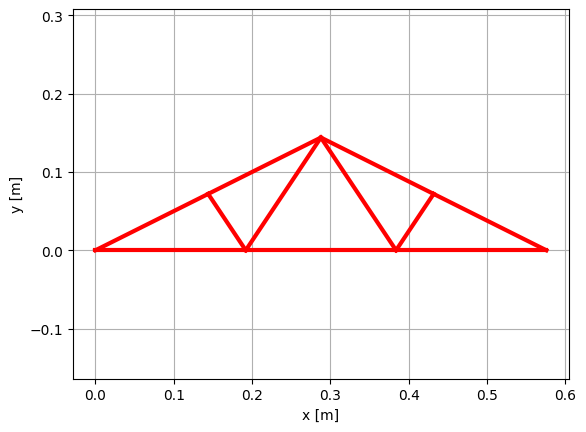

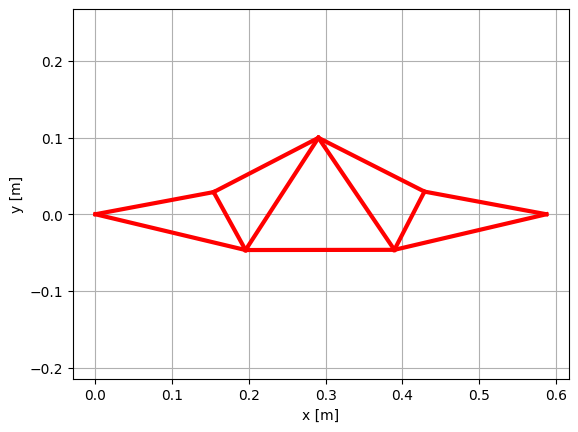

In [151]:
# Gerando a nova imagem mas já com as deformações
# Primeiro aplicar as deformações em uma cópia e depois usar o plota()

lista_novas_posicoes_x = np.zeros(nn)
lista_novas_posicoes_y = np.zeros(nn)
lista_total = np.zeros((2,nn))
for i in range(nn) :
    lista_novas_posicoes_x[i] = N[0,i] + Utotal[2*i]*10
    lista_novas_posicoes_y[i] = N[1,i] + Utotal[2*i+1]*10
    lista_total[0,i] = lista_novas_posicoes_x[i]
    lista_total[1,i] = lista_novas_posicoes_y[i]
print(lista_total)
print(N)
plota(N, Inc)
plota(lista_total, Inc)

